In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import citypy module to determine city name from coordinates
from citipy import citipy
# import datetime
from datetime import datetime
import requests
from config import weather_api_key
import time
# Import linear regression dependency
from scipy.stats import linregress

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [3]:
# Create a list to hold city names
cities = []

# Identify the cities for each longitude and latitude combo
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If city is unique we will add it to the cities list
    if city not in cities:
        cities.append(city)
# Print city count to confirm
print(len(cities))

634


In [4]:
city_data = []
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Print the beginning of the logging
print('Beginning data retrieval    ')
print('----------------------------')

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
     # Run an API request for each of the cities.
   # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning data retrieval    
----------------------------
Processing Record 1 of Set 1 | smidovich
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | olafsvik
Processing Record 5 of Set 1 | yellowknife
Processing Record 6 of Set 1 | ribeira grande
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | neftcala
Processing Record 11 of Set 1 | plouzane
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | khatanga
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | victoria
Processing Record 19 of Set 1 | carazinho
Processing Record 20 of Set 1 | bonito
Processing Record 21 of Set 1 | hobart
Processing Recor

In [5]:
len(city_data)

585

In [7]:
city_data_df = pd.DataFrame(city_data)

In [8]:
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Smidovich,48.60,133.82,40.05,76,100,5.48,RU,2020-03-31 01:36:34
1,Nikolskoye,59.70,30.79,28.99,78,3,4.47,RU,2020-03-31 01:34:13
2,Mataura,-46.19,168.86,69.01,57,0,1.99,NZ,2020-03-31 01:33:22
3,Olafsvik,64.89,-23.71,41.83,91,100,24.79,IS,2020-03-31 01:36:34
4,Yellowknife,62.46,-114.35,5.00,42,20,12.75,CA,2020-03-31 01:33:29
5,Ribeira Grande,38.52,-28.70,58.84,76,54,21.65,PT,2020-03-31 01:33:41
6,Punta Arenas,-53.15,-70.92,48.20,70,40,17.22,CL,2020-03-31 01:33:12
7,Rikitea,-23.12,-134.97,78.48,75,29,4.85,PF,2020-03-31 01:33:28
8,Neftcala,39.37,49.25,53.74,68,66,11.81,AZ,2020-03-31 01:36:36
9,Plouzane,48.38,-4.62,44.60,75,23,17.22,FR,2020-03-31 01:36:36


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]

In [10]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Smidovich,RU,2020-03-31 01:36:34,48.60,133.82,40.05,76,100,5.48
1,Nikolskoye,RU,2020-03-31 01:34:13,59.70,30.79,28.99,78,3,4.47
2,Mataura,NZ,2020-03-31 01:33:22,-46.19,168.86,69.01,57,0,1.99
3,Olafsvik,IS,2020-03-31 01:36:34,64.89,-23.71,41.83,91,100,24.79
4,Yellowknife,CA,2020-03-31 01:33:29,62.46,-114.35,5.00,42,20,12.75


In [11]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label='City_ID')

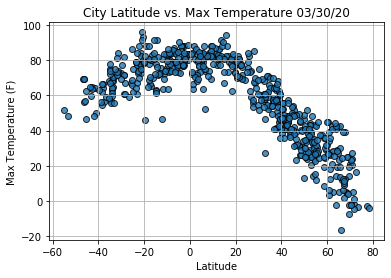

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Get today's date in seconds.
today = time.time()
today

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


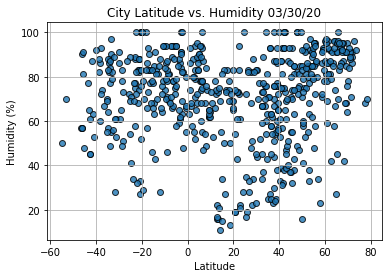

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

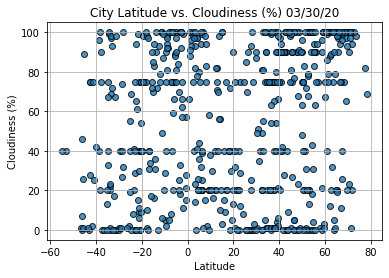

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

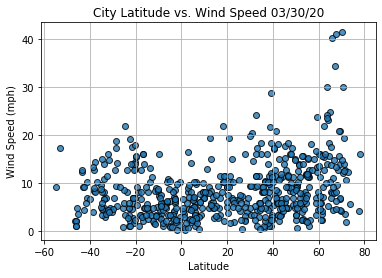

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [56]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
     # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values, alpha=.8, edgecolor='black', linewidth=1)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    print(f"Slope = {slope}, Intercept = {intercept}, r-value = {r_value}, p-value = {p_value}, Standard Error = {std_err}")

In [17]:
northern_hemi_df = city_data_df.loc[(city_data_df['Lat'] >= 0)]

In [18]:
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <= 0]

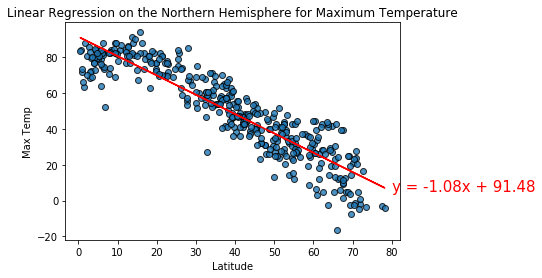

Slope = -1.0789803609573074, Intercept = 91.48432235080438, r-value = -0.9092370152144474, p-value = 1.1576922107051244e-151, Standard Error = 0.02491864739004009


In [80]:
# Linear regression on the Northern Hemisphere for amx temperature
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(80,5))

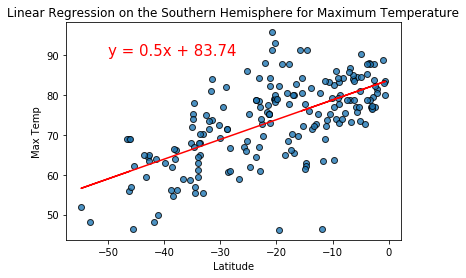

Slope = 0.49564884468052384, Intercept = 83.73856830108473, r-value = 0.6384233954565928, p-value = 3.826489926205112e-23, Standard Error = 0.04358124285581318


In [58]:
# Linear regression on the Southern Hemisphere for max temperature
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

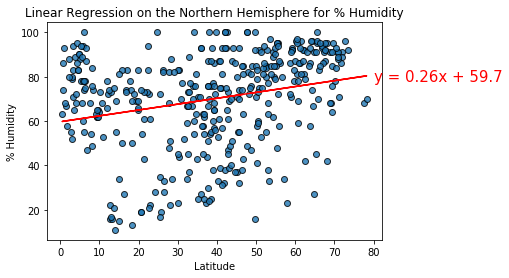

Slope = 0.26426073176625425, Intercept = 59.70387762344581, r-value = 0.2512658774072133, p-value = 4.206234742557067e-07, Standard Error = 0.05135011937022484


In [79]:
# Linear regression on the Northern Hemisphere for humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(80,78))

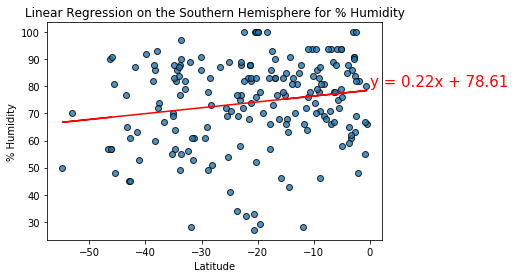

Slope = 0.2162656011198492, Intercept = 78.60936719668992, r-value = 0.17351032935398067, p-value = 0.016662109709780465, Standard Error = 0.08952521266453965


In [78]:
# Linear regression on the Southern Hemisphere for humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(0,80))

In [39]:
northern_hemi_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Smidovich,RU,2020-03-31 01:36:34,48.60,133.82,40.05,76,100,5.48
1,Nikolskoye,RU,2020-03-31 01:34:13,59.70,30.79,28.99,78,3,4.47
3,Olafsvik,IS,2020-03-31 01:36:34,64.89,-23.71,41.83,91,100,24.79
4,Yellowknife,CA,2020-03-31 01:33:29,62.46,-114.35,5.00,42,20,12.75
5,Ribeira Grande,PT,2020-03-31 01:33:41,38.52,-28.70,58.84,76,54,21.65


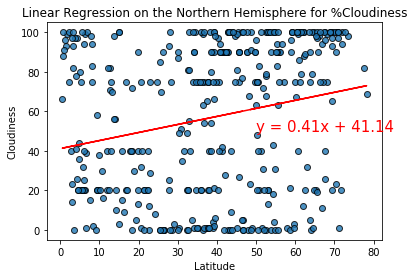

Slope = 0.4068022128203146, Intercept = 41.14290644280334, r-value = 0.22088092790221237, p-value = 9.386055537388402e-06, Standard Error = 0.09060817558351049


In [61]:
# Linear regression on the northern hemisphere for cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for %Cloudiness', 'Cloudiness',(50,50))

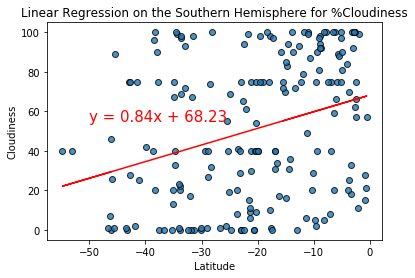

Slope = 0.8417952278623966, Intercept = 68.22527446707278, r-value = 0.30785340402674705, p-value = 1.554152986032259e-05, Standard Error = 0.1897414223808318


In [62]:
# Linear regression on the Southern Hemisphere for cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for %Cloudiness', 'Cloudiness',(-50,55))

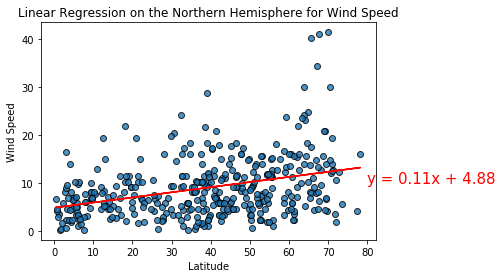

Slope = 0.10683768373911703, Intercept = 4.876484547604847, r-value = 0.3480021366072584, p-value = 1.0934870609580505e-12, Standard Error = 0.014518262847362424


In [68]:
# Linear regression on the Northern Hemisphere for wind speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(80,10))

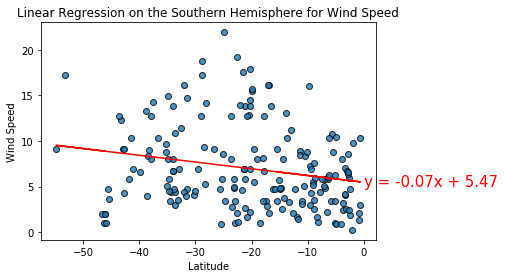

Slope = -0.0739669419632882, Intercept = 5.468006332669805, r-value = -0.2136959155136821, p-value = 0.003072084593175369, Standard Error = 0.024661116166911648


In [81]:
# Linear regression on the Southern Hemisphere for wind speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(0,5))